# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import os
os.getcwd()

'/home/workspace/dog_project'

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
# Data Exploration
print('Total number of human face images:', len(glob("/data/lfw/*/*")))
print('Total number of human face folders:', len(glob("/data/lfw/*")))
print('Total number of folders in "dog images:"', len(glob('/data/dog_images/*')))
print('Folders in "dog images:"', end=' ')
print(*[x.split('/')[-1]for x in glob('/data/dog_images/*')], sep=',')
print('Total images in /dog_images/train :', len(glob("/data/dog_images/train/*/*")))
print('Total images in /dog_images/test :', len(glob("/data/dog_images/test/*/*")))
print('Total images in /dog_images/valid :', len(glob("/data/dog_images/valid/*/*")))

Total number of human face images: 13233
Total number of human face folders: 5749
Total number of folders in "dog images:" 3
Folders in "dog images:" train,test,valid
Total images in /dog_images/train : 6680
Total images in /dog_images/test : 836
Total images in /dog_images/valid : 835


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


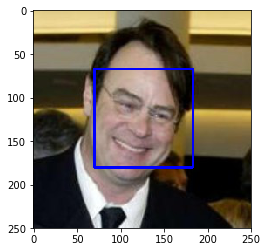

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [5]:
# Nested numpy array containing bounding box coordinates 
# for each detected face
faces

array([[ 70,  67, 113, 113]], dtype=int32)

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- 98% of the first 100 pictures found in the human_files_short are human faces.
- 17% of the first 100 pictures found in dog_files_short are human faces. We know ideally there should only be dog images.  

In [46]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

count_humans = 0
count_dogs = 0

for file in human_files_short:
    if face_detector(file) == True:
        count_humans += 1

for file in dog_files_short:
    if face_detector(file) == True:
        count_dogs += 1
        
print('%.1f%% of the first 100 human_files were detected as human face.' % count_humans)
print('%.1f%% of the first 100 dog_files were detected as human face.' % count_dogs)



98.0% of the first 100 human_files were detected as human face.
17.0% of the first 100 dog_files were detected as human face.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 85613378.24it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [19]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Import image from img_path in PIL format
    input_image = Image.open(img_path) 
    # PyTorch Documentation says...
    # All pre-trained models expect input images normalized in the same way,    
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W),
    # where H and W are expected to be at least 224.
    # The images have to be loaded in to a range of [0, 1] and
    # then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    # VGG-16 takes 224x224 images as input, so we resize all of them
    # and prepare the transformation of the image
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()])
    input_tensor = preprocess(input_image)
    # Added this line to convert 4 channel PNGs in final sample data to 3 channels 
    input_tensor = input_tensor[:3,:,:]
    #print (input_tensor.shape)
    # create a mini-batch as expected by the model
    input_batch = input_tensor.unsqueeze(0)
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        VGG16.to('cuda')
    # Get predicted category for the image
    with torch.no_grad():
        output = VGG16(input_batch)
        prediction = torch.argmax(output).item()
    return prediction # predicted class index

In [49]:
VGG16_predict(dog_files_short[0])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [21]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return prediction >= 151 and prediction <= 268 # true/false

In [51]:
print('Are dogs detected in the dog files?',dog_detector(dog_files_short[0]))
print('Are dogs detected in the human files?',dog_detector(human_files_short[0]))

Are dogs detected in the dog files? True
Are dogs detected in the human files? False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- 0% of the images in the first 100 human_files_short did not detect dog.
- 90% of the images in the first 100 dog_files_short have a detected dog.

In [23]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


count_humans = 0
count_dogs = 0

for file in human_files_short:
    if dog_detector(file) == True:
        count_humans += 1
        
for file in dog_files_short:
    if dog_detector(file) == True:
        count_dogs += 1
        
print('%.1f%% images of the first 100 human_files_short were detected as dog.' % count_humans)
print('%.1f%% images of the first 100 dog_files_short were detected as dog.' % count_dogs)

0.0% images of the first 100 human_files_short were detected as dog.
90.0% images of the first 100 dog_files_short were detected as dog.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [24]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Image preprocessing, typically, we resize, center crop,
# convert to tensor, and normalize with mean and standard deviation.
# Data Augmentation, we simply increase the training images by applying
# randon transformation such as rotation, flip, colorJitter
# and many more.
# When we do image preprocessing, we simultaneously apply data augmentation 
# to the training set

# Step 1 
### We do data preprocessing and data augmentation.  
### VGG16 model has an input size of 224 X 224.  We need to resize 
### the images. 
### Convert to Tensor
### Normalize the images

# Step 2
### Create datasets 

# Step 3
### Create Data Loaders


# Step 1 - Image Preprocessing and Data Augmentation
preprocess_data = {
    
    # Training Data with Data Augmentation
    'train' : transforms.Compose([transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    
    
    # Validation and Test data does not use Data Augmentation
    # We only resize, crop and normalize the validation / test dataset
    
    # Validation data
    'valid' : transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])]),
    # Test Data
    'test' : transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])
}


# Step 2 - Datasets 

data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# Load datasets using the datasets.ImageFolder

train_data = datasets.ImageFolder(train_dir, transform=preprocess_data['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=preprocess_data['valid'])
test_data = datasets.ImageFolder(test_dir, transform=preprocess_data['test'])





In [25]:
# Check Step 2

### Check to see if train, validation and test ImageFolders 
### has the right transformation
train_data, valid_data, test_data

(Dataset ImageFolder
     Number of datapoints: 6680
     Root Location: /data/dog_images/train/
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                              RandomHorizontalFlip(p=0.5)
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                          )
     Target Transforms (if any): None, Dataset ImageFolder
     Number of datapoints: 835
     Root Location: /data/dog_images/valid/
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              CenterCrop(size=(224, 224))
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.406], std=[0.2

In [26]:
# Check Step 2...continued

### Check the datasets
print('Total number of breeds:', len (train_data.classes))
print('Number of training images:', len(train_data))
print('Number of validation images:', len(valid_data))
print('Number of test images:', len(test_data))

Total number of breeds: 133
Number of training images: 6680
Number of validation images: 835
Number of test images: 836


In [27]:
# Step 3 - Create DataLoaders

# How many samples will be loaded for one batch?
batch_size = 20
# Number of subprocesses to use for data loading, 
# if it is 0 then it uses the main process.
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size = batch_size,
                                           num_workers = num_workers,
                                           shuffle = True)

valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size = batch_size,
                                           num_workers = num_workers,
                                           shuffle = False)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size = batch_size,
                                          num_workers = num_workers,
                                          shuffle = False)

# store the data loaders into a dictionary
loaders_scratch = {
    'train' : train_loader,
    'valid' : valid_loader,
    'test' : test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

1.  In the training data, I resized the images by using the RandomResizedCrop.  This is because I am using the VGG16 model with 224 X 224 input images. As a result, I resized and cropped images to 224 X 224.  In addition, I picked the 224 X 224 as the input tensor. According to the original VGG16 paper(Very Deep Convolutional Networks For Large-Scale Image Recognition), to obtain the fixed size of 224 X 224 ConvNet input images, they were randomly cropped from rescaled training images. This VGG16 paper also mentions that this crop will capture the whole-image statistics, completely spanning the smallest side of a training image.   

2.  Yes, I did augment the dataset by utilizing the RandomHorizontalFlip in the training data.  I randomly flipped the images to create more variety so that the model knows it is still the same picture but presented in a different angle. Based on my reading from the original VGG16 paper, this data augmentation is recommended by the authors.
 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [28]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        ### self.convx = nn.Conv2d(depth, no.of filters, filter/kernel size)
        
        # convolutional layer (224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        # convolutional layer (112x112x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding = 1)
        # convolutional layer (56x56x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully connected layers
        ## linear layer(28x28x64 -> 512)
        ## The 512 is an arbitary number
        self.fc1 = nn.Linear(28 * 28 * 64, 512)
        # linear layer(512 -> 133)
        # The Last fully connected layer's output is 133(Number of Dog breed classes)
        self.fc2 = nn.Linear(512, 133)
        
        #Dropout layer (p=0.6)
        self.dropout = nn.Dropout(0.6)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # Flatten image input
        x = x.view(-1, 64 * 28 * 28)
        # Add Dropout Layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add Dropout layer
        x = self.dropout(x)
        # Add 2nd hidden layer
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [29]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.6)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I used a CNN architecture that is very similar to what was taught in the Udacity lessons.  I wanted an architecture that was simple not complicated. So I chose to do 3 convulation layers and 2 fully connected layers with 2D max pooling layer and ReLu activation function. CNN is a combination of feature learning(Conv, Relu, and Pool) and classification. The classification for this project are the dog breeds.

In the feature learning, I chose 3 convulation layers. Each convolutional layer had a kernel size of 3. The purpose of the convulation layer is to extract features of the input volumes.  Each convulation layer has a ReLu activation and 2D maxpooling layer. The ReLu layer turns negative values to zero.  This layer does not change the volume size.  I used max pooling with 2x2 filter. It has receptive fields of 2 and stride of 2. It is the most common choice for down sampling in classification problems. The max pool layer reduces the spatial dimensions(Width x Height) of the input for the next convulational layer and controls overfitting. It does not affect the depth dimension of the volume.  Max pool takes the most important part(the brightest pixel value) of the input volume. 

In the classification portion of the CNN architecture are the linear layers.  I have 2 fully connected layers. It is fully connected with the output of the previous layer. In the last convulation-ReLu layer, I flattened the entire feature map before passing into the image.  Our flattened image would have 28x28x64 in dimension. The last fully connected layer holds the output, the dog breed class scores.  The last fully connected layer(fc2) computes the scores for each of the dog breed classes. We have 133 dog breed classes. A dropout(p=0.6) is applied in the fully connected layers to avoid overfitting. It is the probability at which outputs of the layers are dropped out.






### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [30]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_scratch = torch.optim.Adam(model_scratch.parameters(), lr=0.001)
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [31]:
# preventing OSError: image file is truncated (150 bytes not processed)
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all the optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs
            # to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect
            # to the model parameters
            loss.backward()
            # perform single optimization step(parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass:  compute predicted outputs by passing
            # inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
                    
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.871224 	Validation Loss: 4.787948
Validation loss decreased (inf --> 4.787948). Saving model...
Epoch: 2 	Training Loss: 4.762354 	Validation Loss: 4.577710
Validation loss decreased (4.787948 --> 4.577710). Saving model...
Epoch: 3 	Training Loss: 4.669328 	Validation Loss: 4.496445
Validation loss decreased (4.577710 --> 4.496445). Saving model...
Epoch: 4 	Training Loss: 4.608328 	Validation Loss: 4.452839
Validation loss decreased (4.496445 --> 4.452839). Saving model...
Epoch: 5 	Training Loss: 4.562658 	Validation Loss: 4.401819
Validation loss decreased (4.452839 --> 4.401819). Saving model...
Epoch: 6 	Training Loss: 4.537213 	Validation Loss: 4.375542
Validation loss decreased (4.401819 --> 4.375542). Saving model...
Epoch: 7 	Training Loss: 4.494068 	Validation Loss: 4.268841
Validation loss decreased (4.375542 --> 4.268841). Saving model...
Epoch: 8 	Training Loss: 4.464016 	Validation Loss: 4.183671
Validation loss decreased (4.268841 --> 4.183671

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [27]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.738741


Test Accuracy: 13% (114/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [32]:
## TODO: Specify data loaders

# Using the same data loaders from the previous step

# Let's make a copy of it
loaders_transfer = loaders_scratch.copy()

In [33]:
print(loaders_transfer)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7fe81901ec88>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7fe81901ecc0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fe81901ecf8>}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [34]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
 
# Load a pre-trained model from PyTorch
# I chose VGG16 architecture
model_transfer = models.vgg16(pretrained=True)

# Freeze all the parameters so that the net acts as fixed feature extractor
# Freezing simply means that the parameters in the pre-trained model
# will not change during training
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
# Final classifier layer
# Modify the final fully connected classifier layer with the total 
# number dog breed classes, 133
n_inputs = model_transfer.classifier[6].in_features
model_transfer.classifier[6] = nn.Linear(n_inputs, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [35]:
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

From my research, the VGG model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.  In addition, this model uses multiple 3X3 kernel-size filters which is what I used for creating a model from scratch from the previous step.  In addition, VGG model is one of the most used image recognition architecture. I wanted to make a comparison of results between VGG16 model and the one I created from scratch. Hence, the reason why I chose VGG16 model architecture for the dog classifier project.

When performing transfer learning, we need to load and shape our input into the pre-trained model input layout. VGG16 model has a 224x224 input dimension which we have already transformed in a previous step, specifically creating a model from scratch section.

We need to freeze all the parameters on VGG16 model, so the network acts as fixed feature extractor.  Freezing simply means that the parameters in the pre-trained model will not change during training.  We remove and replace the last fully connected layer of the VGG16 model.  We replace the last layer with a linear classifier of our own.  I changed the last fully connected layer classifier to match the number of dog breed, which is 133.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [36]:
criterion_transfer = nn.CrossEntropyLoss()
# optimizer_transfer = optim.Adam(model_transfer.classifier.parameter(), lr=0.001)
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# train the model
# model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.257763 	Validation Loss: 2.866507
Validation loss decreased (inf --> 2.866507). Saving model...
Epoch: 2 	Training Loss: 2.679128 	Validation Loss: 1.268865
Validation loss decreased (2.866507 --> 1.268865). Saving model...
Epoch: 3 	Training Loss: 1.794014 	Validation Loss: 0.747322
Validation loss decreased (1.268865 --> 0.747322). Saving model...
Epoch: 4 	Training Loss: 1.452252 	Validation Loss: 0.583342
Validation loss decreased (0.747322 --> 0.583342). Saving model...
Epoch: 5 	Training Loss: 1.322304 	Validation Loss: 0.516132
Validation loss decreased (0.583342 --> 0.516132). Saving model...
Epoch: 6 	Training Loss: 1.182238 	Validation Loss: 0.464661
Validation loss decreased (0.516132 --> 0.464661). Saving model...
Epoch: 7 	Training Loss: 1.126949 	Validation Loss: 0.448973
Validation loss decreased (0.464661 --> 0.448973). Saving model...
Epoch: 8 	Training Loss: 1.058621 	Validation Loss: 0.405332
Validation loss decreased (0.448973 --> 0.405332

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [32]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.412608


Test Accuracy: 87% (732/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [37]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]

# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]


In [38]:
# Check the loaders_transfer

loaders_transfer['train'].dataset.classes[:5]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute']

In [43]:
from PIL import Image
import torchvision.transforms as transforms
import os

# Load the image
# Pre-process & Data Augmentation
# Transform and Normalize the input image 
    
def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    picture_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])

# discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = picture_transform(image)[:3,:,:].unsqueeze(0)
    return image

def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    if os.path.isfile(img_path):
        img = load_input_image(img_path)
        model = model.cpu()
        model.eval()
        idx = torch.argmax(model(img))
        return class_names[idx]

for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    prediction = predict_breed_transfer(model_transfer, class_names, img_path)
    print("Image_file_name: {0}, \t ******* Predicted Breed: {1}".format(img_path, prediction))

Image_file_name: ./images/American_water_spaniel_00648.jpg, 	 ******* Predicted Breed: Belgian sheepdog
Image_file_name: ./images/Labrador_retriever_06455.jpg, 	 ******* Predicted Breed: Norwegian buhund
Image_file_name: ./images/Welsh_springer_spaniel_08203.jpg, 	 ******* Predicted Breed: German shepherd dog
Image_file_name: ./images/Labrador_retriever_06449.jpg, 	 ******* Predicted Breed: Irish terrier
Image_file_name: ./images/sample_cnn.png, 	 ******* Predicted Breed: Doberman pinscher
Image_file_name: ./images/Labrador_retriever_06457.jpg, 	 ******* Predicted Breed: Doberman pinscher
Image_file_name: ./images/Curly-coated_retriever_03896.jpg, 	 ******* Predicted Breed: Chinese crested
Image_file_name: ./images/sample_dog_output.png, 	 ******* Predicted Breed: Dachshund
Image_file_name: ./images/Brittany_02625.jpg, 	 ******* Predicted Breed: German shepherd dog
Image_file_name: ./images/sample_human_output.png, 	 ******* Predicted Breed: Great dane


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

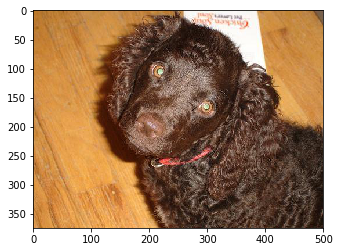

Detected: A DOG
Hello Dog !
Your breed is...
Belgian sheepdog




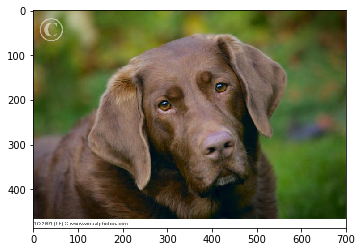

Detected: A DOG
Hello Dog !
Your breed is...
Norwegian buhund




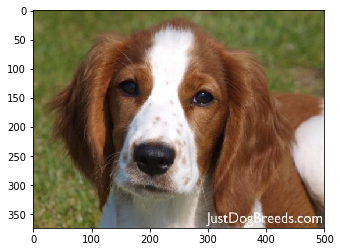

Detected: A DOG
Hello Dog !
Your breed is...
German shepherd dog




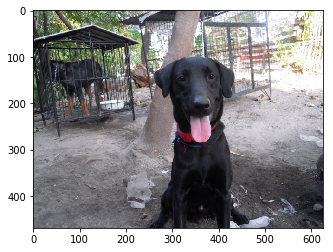

Detected: A DOG
Hello Dog !
Your breed is...
Irish terrier




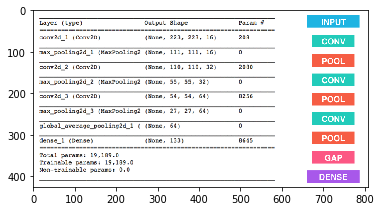

Detected: NONE
You are neither a human or a dog.  We are unable to detect your face.
Try again, please!




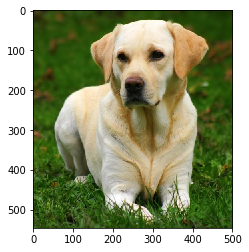

Detected: A DOG
Hello Dog !
Your breed is...
Doberman pinscher




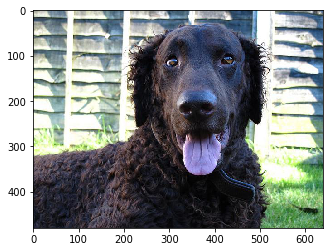

Detected: A DOG
Hello Dog !
Your breed is...
Chinese crested




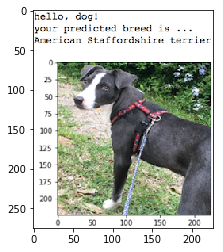

Detected: A DOG
Hello Dog !
Your breed is...
Dachshund




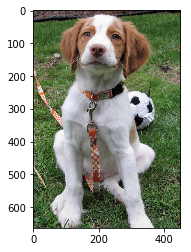

Detected: A DOG
Hello Dog !
Your breed is...
German shepherd dog




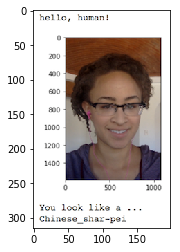

Detected: A HUMAN
Hello Human !
If you were a dog. You would look, a lot like a...
Great dane




In [44]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    human = face_detector(img_path)
    dog = dog_detector(img_path)
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
         
        
    if dog:
        print('Detected: A DOG')
        print('Hello Dog !')
        print('Your breed is...')
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print(prediction)
    elif human:
        print('Detected: A HUMAN')
        print('Hello Human !')
        print('If you were a dog. You would look, a lot like a...')
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)   
        print(prediction)
    else:
        print('Detected: NONE')
        print('You are neither a human or a dog.  We are unable to detect your face.')
        print('Try again, please!')
    print('\n')
# check the run_app with sample image from the dog_files
# run_app(dog_files[20])

for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvements)

The output did a very good job of predicting dog, human and neither.  It was able to categorize(dog, human and neither) in the sample images very well.  However, it did not do well in predicting the right dog breeds.  Some possible improvements are as follows:

1. Try different hyperparameters such as weight initialization, loss function, learning rates, optimizers, and models to improve the algorithm.
2. Add more images via data augmentation to improve the training model. More training images will improve the algorithm.
3. Increase the layers or the depth of the neural network.  This could possibly improve the accuracy of the algorithm.


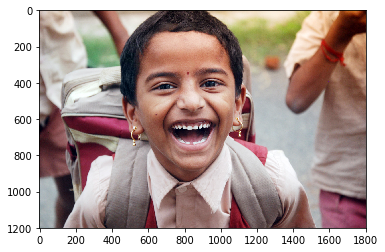

Detected: A HUMAN
Hello Human !
If you were a dog. You would look, a lot like a...
Dachshund


-----------------------------------------------------------


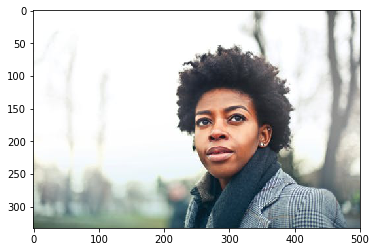

Detected: A HUMAN
Hello Human !
If you were a dog. You would look, a lot like a...
Alaskan malamute


-----------------------------------------------------------


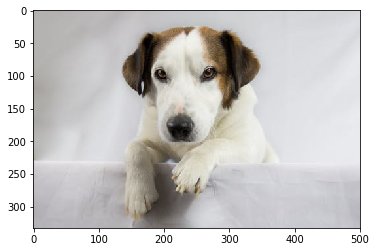

Detected: A DOG
Hello Dog !
Your breed is...
Doberman pinscher


-----------------------------------------------------------


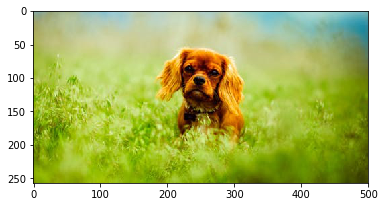

Detected: A DOG
Hello Dog !
Your breed is...
Boxer


-----------------------------------------------------------


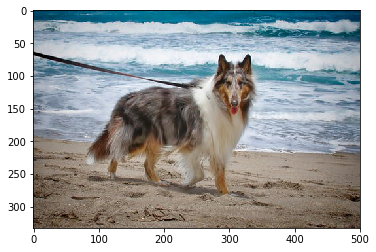

Detected: A DOG
Hello Dog !
Your breed is...
American water spaniel


-----------------------------------------------------------


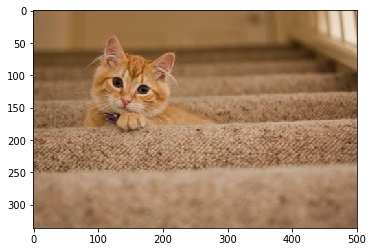

Detected: NONE
You are neither a human or a dog.  We are unable to detect your face.
Try again, please!


-----------------------------------------------------------


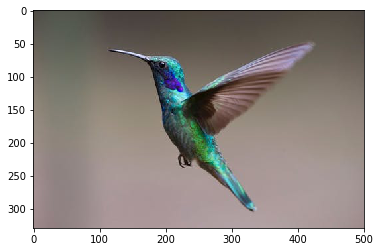

Detected: NONE
You are neither a human or a dog.  We are unable to detect your face.
Try again, please!


-----------------------------------------------------------


In [45]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)

my_human_files = ['./my_images/human1.jpeg', './my_images/human2.jpeg']
my_dog_files = ['./my_images/dog1.jpeg', './my_images/dog2.jpeg', './my_images/dog3.jpeg']
my_other_files = ['./my_images/other1.jpeg', './my_images/other2.jpeg']

for file in np.hstack((my_human_files, my_dog_files, my_other_files)):
    run_app(file)
    print('-----------------------------------------------------------')